In [37]:
import pandas as pd
import os
import numpy as np
import scipy.stats

import datetime

In [38]:
# Mouse
file_in_ls = 'ls_w2_mm_edit'
path_in_bw_hg = '/media/vetbio/Extend_03/210301_Main_Ref_Epi/01_Public/public_ChIP_220614/Human'
path_in_bw_mm = '/media/vetbio/Extend_03/210301_Main_Ref_Epi/01_Public/public_ChIP_220614/Mouse'
path_in_bed_hg = '02_ortho_bed_w2species/hg38_mm10'
path_in_bed_mm = '01_merge_bed/mm10'

path_out = '03_bw_signal_w2_hg_mm'

In [39]:
ls_process = ['k4me3_pro', 'k4me1_pro', 'k27ac_pro', 'k4me1_enh', 'k27ac_enh', 'k4me3_other', 'k4me1_other', 'k27ac_other', 'k27me3_other', 'k9me3_other']
ls_tissue = ['CL_Adult', 'CL_P0', 'CR_Adult', 'CR_P0', 'CO_Adult', 'CO_P0', 'KI_Adult', 'KI_P0', 'LI_Adult', 'LI_P0', 'LU_Adult', 'LU_P0', 'MG_Adult', 'MG_P0', 'OV_Adult', 'OV_P0', 'PA_Adult', 'PA_P0', 'SP_Adult', 'SP_P0', 'ST_Adult',  'ST_P0']
ls_region = ['pro', 'enh', 'other']
ls_mark = ['k4me3', 'k4me1', 'k27ac', 'k27me3', 'k9me3']

#pd_hm_pearson = pd.DataFrame(index=ls_tissue, columns=ls_process)
pd_hm_spearman = pd.DataFrame(index=ls_tissue, columns=ls_process)

In [40]:
"""
# Calculate bw signal
with open(file_in_ls, 'r') as ls_tissue_mark:
    for line in ls_tissue_mark:
        d = datetime.datetime.now()
        
        tissue = line.strip().split('\t')[0]
        mark = line.strip().split('\t')[1]
        stage = line.strip().split('\t')[2]
        for region in ls_region:
            if f'{mark}_{region}' in ls_process:
                print(f'## {tissue}, {mark}, {region}, {stage}, {d}')
                
                ## set name of input and output
                in_bw_hg = f'{path_in_bw_hg}/{tissue}_{mark}_hg38.mg.bw'
                in_bw_mm = f'{path_in_bw_mm}/{tissue}_{mark}_mm10_{stage}.bw'
                in_bed_hg = f'{path_in_bed_hg}/{tissue}_{region}_hg38_ortho.bed'
                in_bed_mm = f'{path_in_bed_mm}/{tissue}_{region}_hg38.mm10.bed'
                
                
                out_hg_txt = f'{path_out}/bw_pval_{tissue}_{region}_{mark}_{stage}_w2_hg.txt'
                out_mm_txt = f'{path_out}/bw_pval_{tissue}_{region}_{mark}_{stage}_w2_mm.txt'
                        
                ## Run command
                cmd_hg = f'./bigWigAverageOverBed {in_bw_hg} {in_bed_hg} {out_hg_txt}'
                cmd_mm = f'./bigWigAverageOverBed {in_bw_mm} {in_bed_mm} {out_mm_txt}'
                
                print(cmd_hg)
                os.system(cmd_hg)

                print(cmd_mm)
                os.system(cmd_mm)
                
"""

"\n# Calculate bw signal\nwith open(file_in_ls, 'r') as ls_tissue_mark:\n    for line in ls_tissue_mark:\n        d = datetime.datetime.now()\n        \n        tissue = line.strip().split('\t')[0]\n        mark = line.strip().split('\t')[1]\n        stage = line.strip().split('\t')[2]\n        for region in ls_region:\n            if f'{mark}_{region}' in ls_process:\n                print(f'## {tissue}, {mark}, {region}, {stage}, {d}')\n                \n                ## set name of input and output\n                in_bw_hg = f'{path_in_bw_hg}/{tissue}_{mark}_hg38.mg.bw'\n                in_bw_mm = f'{path_in_bw_mm}/{tissue}_{mark}_mm10_{stage}.bw'\n                in_bed_hg = f'{path_in_bed_hg}/{tissue}_{region}_hg38_ortho.bed'\n                in_bed_mm = f'{path_in_bed_mm}/{tissue}_{region}_hg38.mm10.bed'\n                \n                \n                out_hg_txt = f'{path_out}/bw_pval_{tissue}_{region}_{mark}_{stage}_w2_hg.txt'\n                out_mm_txt = f'{path_out}/b

In [41]:
# Calculate corr. & pval and merge results
with open(file_in_ls, 'r') as ls_tissue_mark:
    for line in ls_tissue_mark:
        tissue = line.strip().split('\t')[0]
        mark = line.strip().split('\t')[1]
        stage = line.strip().split('\t')[2]
        for region in ls_region:
            if f'{mark}_{region}' in ls_process:
                print(f'## {tissue}, {mark}, {region}, {stage}')
                
                ## set name of input and output
                in_hg_txt = f'{path_out}/bw_pval_{tissue}_{region}_{mark}_{stage}_w2_hg.txt'
                in_mm_txt = f'{path_out}/bw_pval_{tissue}_{region}_{mark}_{stage}_w2_mm.txt'

                pd_bw_hg = pd.read_csv(in_hg_txt, sep='\t', header=None, index_col=0)[4]
                pd_bw_mm = pd.read_csv(in_mm_txt, sep='\t', header=None, index_col=0)[4]
                
                pd_mg = pd.concat([pd_bw_mm, pd_bw_hg], axis=1)
                pd_mg.columns = ['mm', 'hg']               
                
                
                #ls_p = scipy.stats.pearsonr(pd_mg['mm'], pd_mg['hg'])
                ls_s = scipy.stats.spearmanr(pd_mg['mm'], pd_mg['hg'])
                    
                #pd_hm_pearson.loc[tissue, f'{mark}_{region}'] = round(ls_p[0], 6)
                pd_hm_spearman.loc[f'{tissue}_{stage}', f'{mark}_{region}'] = round(ls_s[0], 6)

## CO, k27ac, pro, P0
## CO, k27ac, enh, P0
## CO, k27ac, other, P0
## CO, k27me3, other, P0
## CO, k4me1, pro, P0
## CO, k4me1, enh, P0
## CO, k4me1, other, P0
## CO, k4me3, pro, P0
## CO, k4me3, other, P0
## CO, k9me3, other, P0
## CR, k27ac, pro, P0
## CR, k27ac, enh, P0
## CR, k27ac, other, P0
## CR, k27me3, other, P0
## CR, k4me1, pro, P0
## CR, k4me1, enh, P0
## CR, k4me1, other, P0
## CR, k4me3, pro, P0
## CR, k4me3, other, P0
## CR, k9me3, other, P0
## CR, k27ac, pro, Adult
## CR, k27ac, enh, Adult
## CR, k27ac, other, Adult
## CR, k4me1, pro, Adult
## CR, k4me1, enh, Adult
## CR, k4me1, other, Adult
## CR, k4me3, pro, Adult
## CR, k4me3, other, Adult
## LI, k27ac, pro, P0
## LI, k27ac, enh, P0
## LI, k27ac, other, P0
## LI, k27me3, other, P0
## LI, k4me1, pro, P0
## LI, k4me1, enh, P0
## LI, k4me1, other, P0
## LI, k4me3, pro, P0
## LI, k4me3, other, P0
## LI, k9me3, other, P0
## LI, k27ac, pro, Adult
## LI, k27ac, enh, Adult
## LI, k27ac, other, Adult
## LI, k27me3, other, Ad

In [42]:
#pd_hm_pearson_rmNA = pd_hm_pearson.fillna(-1)
#pd_hm_pearson_rmNA_rm0 = pd_hm_pearson_rmNA[pd_hm_pearson_rmNA.sum(axis=1) != -6]

pd_hm_spearman_rmNA = pd_hm_spearman.fillna(0)
pd_hm_spearman_rmNA_rm0 = pd_hm_spearman_rmNA[pd_hm_spearman_rmNA.sum(axis=1) != 0]

In [43]:
pd_hm_spearman_rmNA_rm0.to_csv('HM_w2_mm_spearman_rmNA_rm0.txt', sep='\t')

In [34]:
pd_hm_spearman_rmNA_rm0.max().max()

0.77472

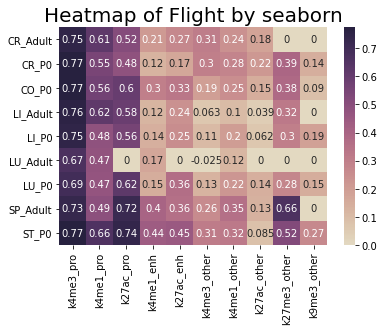

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(pd_hm_spearman_rmNA_rm0, 
                 cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),
                 vmin=0, vmax=0.77472,
                 annot=True)
#ax = sns.heatmap(pd_hm_spearman_rmNA_rm0.drop(index = 'SP'), 
#                 cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), 
#                 annot=True)

plt.title('Heatmap of Flight by seaborn', fontsize=20)

plt.savefig('HM_w2_mm_spearman_rmNA_rm0.pdf')

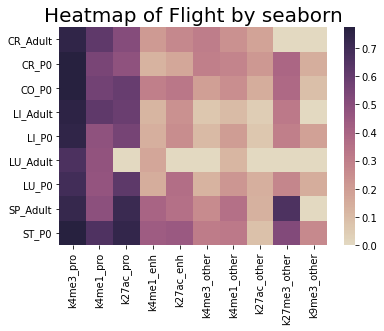

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(pd_hm_spearman_rmNA_rm0, 
                 cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),
                 vmin=0, vmax=0.77472)

plt.title('Heatmap of Flight by seaborn', fontsize=20)

plt.savefig('HM_w2_mm_spearman_rmNA_rm0_noAnn.pdf')